(prob102)=
# Problema 1.2

Describir sistemas de control adecuados para regular la temperatura de
un edificio en los que se mida:

1.  La temperatura interior

2.  La temperatura exterior

Discutir las ventajas e inconvenientes de las diferentes posibilidades.

---

**Solución**

a\) **La temperatura interior**

En este caso, la solución más sencilla es diseñar un sistema de control
por retroalimentación, como muestra el diagrama de bloques siguiente:

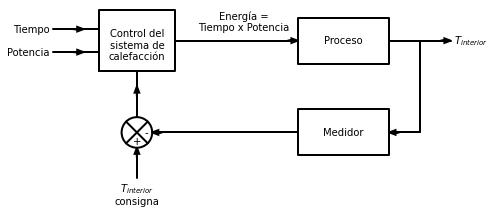

In [4]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw import dsp

d = schemdraw.Drawing(unit=1, fontsize=10)

d += (control := dsp.Ic(pins=[dsp.IcPin(side='L'), dsp.IcPin(side='L'), dsp.IcPin(side='R'),
                              dsp.IcPin(side='B')], w=2.5).label('Control del\nsistema de\ncalefacción'))
d += dsp.Arrow().label('Tiempo', 'left').at(control.inL2).left().reverse()
d += dsp.Arrow().at(control.inL1).label('Potencia', 'left').reverse()
d += dsp.Arrow().at(control.inR1).label('Energía =\nTiempo x Potencia', 'top').right().length(3.5)
d += (proceso := dsp.Box(h=1.5).label('Proceso').anchor('W'))
d += dsp.Line().at(proceso.E).right()
d += (bifur := dsp.Dot(radius=0))
d += dsp.Arrow().label('$T_{interior}$', 'right')
d += dsp.Line().at(bifur.center).down().length(3)
d += dsp.Arrow().left()
d += (medidor := dsp.Box(h=1.5).label('Medidor').anchor('E'))
d += dsp.Line().left().at(medidor.W).length(4.75)
d += dsp.Arrowhead()
d += (suma := dsp.Mixer(W="-", N="+").anchor('W'))
d += dsp.Arrow().at(suma.S).up().toy(control.inB1)
d += dsp.Arrowhead().at(suma.N)
d += dsp.Line().down().at(suma.N).label('$T_{interior}$\nconsigna', 'left').reverse()


d.draw()

El medidor mide la temperatura interior de la local que deseamos
mantener a una temperatura constante. El valor medido de la temperatura
se envía a un comparador, con lo que se obtiene la diferencia de
temperatura existente entre la medida y la deseada. Ese error se envía
al controlador que actúa sobre el sistema de calefacción. Este sistema
de calefacción suministra una cierta potencia. El sistema de control
"decide" durante cuánto tiempo se debe suministrar potencia al local, es
decir, cuánta energía se suministra para aumentar la temperatura, si la
temperatura interior es inferior a la de consigna.

 

b\) **La temperatura exterior**

En este caso se opta por seleccionar un sistema de control de lazo
abierto, como el que muestra el diagrama de bloques siguiente:

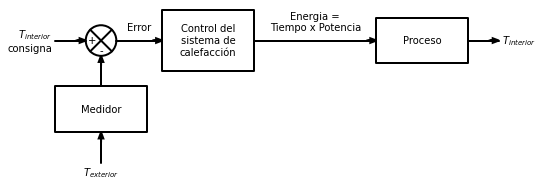

In [3]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Line().right().label('$T_{interior}$\nconsigna', 'left')
d += dsp.Arrowhead()
d += (suma := dsp.Mixer(W="+", S="-").anchor('W'))
d += dsp.Arrow().label('Error', 'top').length(1.5)
d += (control := dsp.Box().anchor('W').label('Control del\nsistema de\ncalefacción'))
d += dsp.Arrow().at(control.E).right().label('Energia =\nTiempo x Potencia', 'top').length(4)
d += (proceso := dsp.Box(h=1.5).anchor('W').label('Proceso'))
d += dsp.Arrow().at(proceso.E).right().label('$T_{interior}$', 'right')
d += dsp.Arrowhead().at(suma.S).up()
d += dsp.Line().at(suma.S).down()
d += (medidor := dsp.Box(h=1.5).label('Medidor').anchor('N'))
d += dsp.Arrow().down().at(medidor.S).label('$T_{exterior}$', 'left').reverse()

d.draw()

En este caso se mide, utilizando un termómetro, la temperatura exterior
y se compara con la temperatura interior deseada. El error obtenido se
lleva al sistema de control de la calefacción, este controlador en
función del error decide la cantidad de energía (es decir, durante
cuánto tiempo se debe suministrar potencia al local) para alcanzar la
temperatura interior deseada.


*Ventajas de cada uno de los sistemas*

El lazo abierto presenta la ventaja de evitar los posibles problemas que
puede significar el tener que controlar un sistema con una gran inercia,
como puede ser el sistema de calefacción de un edificio. Estos sistemas
responden a los cambios muy lentamente, lo que significa que presentará
bastantes problemas (como se verá en temas posteriores) a la hora de
diseñar el sistema de control por retroalimentación.

El principal problema del sistema de lazo abierto es que debe de tener
una buena curva de calibrado (que relacione el error con la cantidad de
energía que se debe suministrar para lograr la temperatura interior
deseada) para funcionar correctamente.